Class def

In [6]:
using PyPlot

In [4]:
type Node
    pos #positon 
    par #parent 
    child #child
end

In [9]:
function initTree(start)
    return [Node(start, 0, Int64[])]
end

initTree (generic function with 1 method)

In [10]:
function addChild(tree, parIdx, pt)
    push!(tree, Node(pt, parIdx, Int64[])) #update tree with new node
    push!(tree[parIdx].child, length(tree)-1) #add new node as child to parent 
    return tree
end


addChild (generic function with 1 method)

In [17]:
function drawTree(tree)
    for i=2:length(tree) #skip root node @idx 1
        pIdx=tree[i].par #get parent index
        drawEdge(tree[i].pos, tree[pIdx].pos)
    end
end


drawTree (generic function with 1 method)

In [57]:
function drawPath(tree, path)
    for idx in path[1:end-1]
        plot(tree[idx].pos[1],tree[idx].pos[2], "mo" )
    end
end


drawPath (generic function with 1 method)

In [43]:
function drawEdge(p1, p2)
    plot([p1[1], p2[1]], [p1[2], p2[2]], "b")  #draw p1 to p2
end

drawEdge (generic function with 2 methods)

In [23]:
function closestNode(tree, pt, thrs=.1)
    #set intial dist
    bestDist=norm(tree[1].pos-pt)
    bestNodeIdx=1
    for i=2:length(tree) #skip root node @idx 1
        dist=norm(tree[i].pos-pt)
        if dist<bestDist    
            bestDist=dist
            bestNodeIdx=i
        end
    end
    bestDist>thrs ? addChild(tree, bestNodeIdx, pt): return 0
end


closestNode (generic function with 2 methods)

In [38]:
function rootPath(tree, idx)
    path=[idx]
    parent=tree[idx].par
    while parent!=0
        push!(path, parent)
        parent=tree[parent].par #get next parent on branch 
    end
    return path
end

rootPath (generic function with 1 method)

In [7]:
function randPt(maxDist, n=2)
    return rand(n)*maxDist
end

randPt (generic function with 2 methods)

tree[end].pos => [8.831686679374805,8.975942430885242]
path => [359,179,52,23,14,2,1]


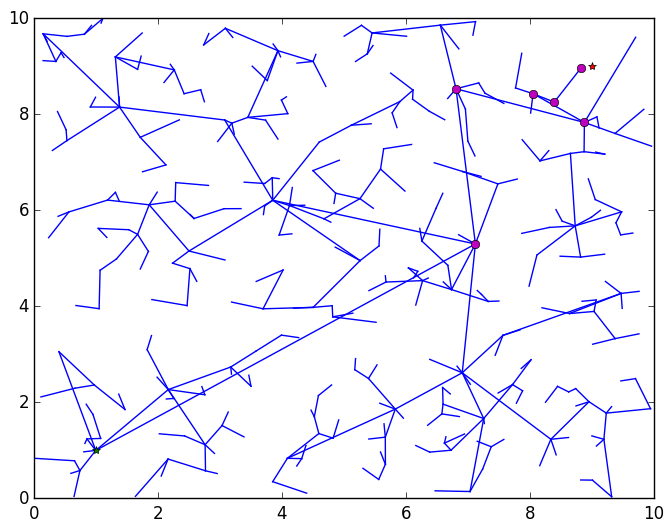

(0,10)

In [58]:
start=[1,1]
goal=[9,9]
thr=.3
global tree=initTree(start)
path=0
for i=1:500
    #get new point
    pt=randPt(10)
    if closestNode(tree, pt) !=0 #if node was added
        if norm(goal-tree[end].pos)<thr
            @show tree[end].pos
            path=rootPath(tree, length(tree))
            break
        end
    end
end
@show path
drawTree(tree)
if path!=0
    drawPath(tree, path)
else
    print("failed to find path")
end


#draw start and end
plot(start[1],start[2], "g*")
plot(goal[1],goal[2], "r*")  

#formated for style
xlim(0, 10)
ylim(0, 10)

In [ ]:
length(tree.child[1].child)

In [ ]:
drawTree(tree)

In [ ]:

p1 =[2,3]
p2 =[9.934834258275059,0.2623354584633364]
plot([p1[1],p2[1]], [p1[2],p2[2]]) 

In [ ]:
[root; [4 5]]

In [ ]:
for i=1:1
    print("HI")
end